In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
data= pd.read_csv('D:/Data/cetpa_ml/Social_Network_Ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [3]:
data.isnull().sum()

User ID             0
Gender              0
Age                 7
EstimatedSalary    10
Purchased           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

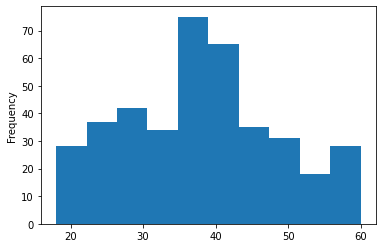

In [4]:
data["Age"].plot.hist()

In [5]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

<AxesSubplot:ylabel='Frequency'>

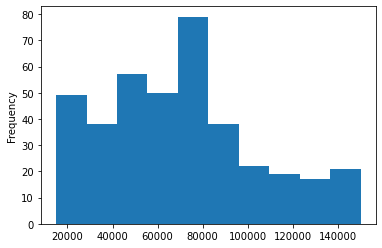

In [6]:
data["EstimatedSalary"].plot.hist()

In [7]:
data["EstimatedSalary"].fillna(data["EstimatedSalary"].median(),inplace=True)

In [8]:
data.pop("User ID")

0      15624510
1      15810944
2      15668575
3      15603246
4      15804002
         ...   
395    15691863
396    15706071
397    15654296
398    15755018
399    15594041
Name: User ID, Length: 400, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB


In [10]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
gen=pd.get_dummies(data["Gender"],drop_first=True)
data=pd.concat((data,gen),axis=1)
data

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19.0,19000.0,0,1
1,Male,35.0,20000.0,0,1
2,Female,26.0,43000.0,0,0
3,Female,27.0,57000.0,0,0
4,Male,19.0,76000.0,0,1
...,...,...,...,...,...
395,Female,46.0,41000.0,1,0
396,Male,51.0,23000.0,1,1
397,Female,50.0,20000.0,1,0
398,Male,36.0,33000.0,0,1


In [12]:
data.pop("Gender")

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [13]:
X = data.drop(["Purchased"],axis=1)
y = data["Purchased"]

In [14]:
print(X,y)

      Age  EstimatedSalary  Male
0    19.0          19000.0     1
1    35.0          20000.0     1
2    26.0          43000.0     0
3    27.0          57000.0     0
4    19.0          76000.0     1
..    ...              ...   ...
395  46.0          41000.0     0
396  51.0          23000.0     1
397  50.0          20000.0     0
398  36.0          33000.0     1
399  49.0          36000.0     0

[400 rows x 3 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [22]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_2 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies_2.mean()
accuracies_2.std()

0.05859465277082314

In [24]:
accuracies_2

array([0.8       , 0.93333333, 0.83333333, 0.93333333, 0.86666667,
       0.83333333, 0.9       , 0.93333333, 1.        , 0.93333333])

In [25]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [26]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [30]:
grid_search = grid_search.fit(X_train, y_train)
grid_search

GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [31]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9

In [32]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}